<h1>SEM5 CS5<h1>
<h2>18BCS6212<h2>
<h3>Practical 9&10<h3>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [3]:
#Reading the Cricket.csv file.
cric = pd.read_csv(r'C:\Users\lenovo\Downloads\Cricket.csv', sep = ',', encoding = "ISO-8859-1", header = 0)

In [4]:
cric.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [5]:
cric.shape

(79, 13)

In [6]:
cric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [7]:
cric.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


<h3>As there is no abrupt change in the 25th, 50th and 75th percentile, so no outliers are present in the data set.<h3>

In [8]:
#Check for missing values
cric.isna().mean().round()*100

Player    0.0
Span      0.0
Mat       0.0
Inns      0.0
NO        0.0
Runs      0.0
HS        0.0
Ave       0.0
BF        0.0
SR        0.0
100       0.0
50        0.0
0         0.0
dtype: float64

<h3>No missing values<h3>

In [9]:
#Selecting only Strike Rate (SR) and Average (Ave) factors for clustering as mentioned in the question.
col = ['SR', 'Ave']
cric = cric[col]

In [10]:
#Standardising usinf StandardScaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

cric = standard_scaler.fit_transform(cric)
cric = pd.DataFrame(cric)
cric.columns = ['SR', 'Ave']

In [11]:
cric.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


In [12]:
#Hopkins function
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1*n)
    nbrs = NearestNeighbors(n_neighbors = 1).fit(X.values)
    
    rand_X = sample(range(0,n,1),m)
    
    ujd = []
    wjd = []
    for j in range(0,m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amax(X, axis = 0),d).reshape(1, -1), 2, return_distance = True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance = True)
        wjd.append(w_dist[0][1])
    H = sum(ujd) / (sum(ujd)+ sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H-0
    return H

In [13]:
hopkins(cric)

0.8881394188342328

<h4>Hopkins value near to 1 is considered good!<h4>

<h3>K-Means with k<h3>

In [14]:
#KMeans with K = 5
model_clus5 = KMeans(n_clusters = 5, max_iter = 50, random_state = 100)
model_clus5.fit(cric)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [15]:
print(model_clus5.cluster_centers_)

[[-0.48727771 -0.82924601]
 [ 0.94780641  2.14053252]
 [ 2.09261936 -1.08814854]
 [ 0.45412212  0.36626792]
 [-0.81272375  0.41326075]]


In [16]:
print(model_clus5.labels_)

[3 3 3 2 0 4 4 4 4 3 3 4 2 1 0 1 0 3 3 4 3 4 4 4 2 1 3 2 0 3 0 0 4 0 1 0 0
 3 1 4 0 0 1 0 0 0 3 0 0 3 2 4 4 0 0 0 4 3 0 3 0 2 4 3 1 3 0 4 3 0 3 0 0 0
 4 4 0 3 0]


Text(0.5, 1.0, 'Scatter plot with 5 clusters')

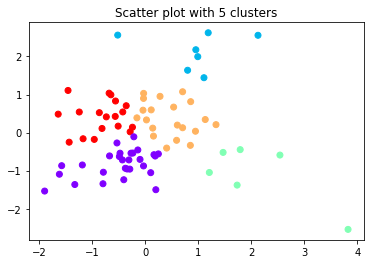

In [17]:
#Plotting scatter for with 5 clusters
plt.scatter(cric.iloc[:,0],cric.iloc[:,1], c=model_clus5.labels_, cmap='rainbow')
plt.title("Scatter plot with 5 clusters")

Text(0.5, 1.0, 'Scatter plot without clustering')

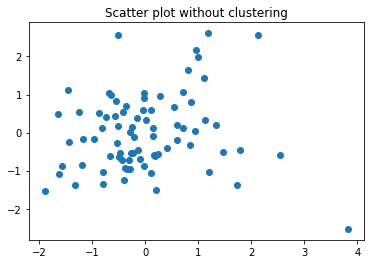

In [18]:
#Original scatter plot of the dataset without clustering
plt.scatter(x = cric['SR'], y = cric['Ave'])
plt.title("Scatter plot without clustering")

<h3>Silhouette Analysis<h3>

In [19]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k, random_state = 100).fit(cric)
    sse_.append([k, silhouette_score(cric, kmeans.labels_)])

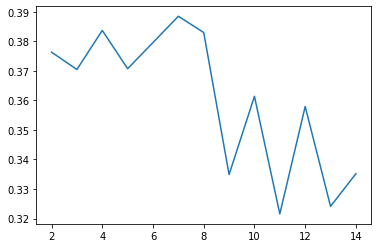

In [20]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

<h3>Sum of squared distances<h3>

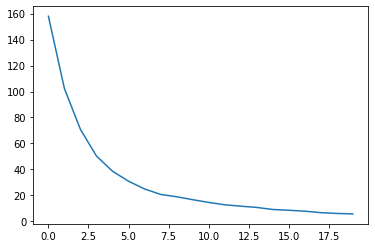

In [21]:
#sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter = 50, random_state = 100)
    model_clus.fit(cric)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd)

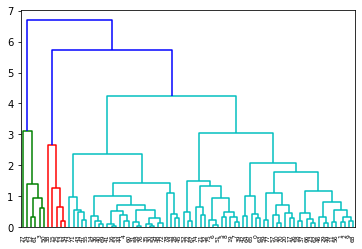

In [22]:
#Dendrogram 
merg = linkage(cric, method = 'complete', metric = 'euclidean')
dendrogram(merg)
plt.show()